### Project - MovieLens Data Analysis

The GroupLens Research Project is a research group in the Department of Computer Science and Engineering at the University of Minnesota. The data is widely used for collaborative filtering and other filtering solutions. However, we will be using this data to act as a means to demonstrate our skill in using Python to “play” with data.

#### Domain 
Internet and Entertainment

**Note that the project will need you to apply the concepts of groupby and merging extensively.**

In [ ]:
# link to Github repository
# https://github.com/GreatLearningAIML1/gl-pgp-aiml-uta-intl-apr20-UlisesHdzG

#### 1. Import the necessary packages - 2.5 marks

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns   
import matplotlib.pyplot as plt
sns.set(color_codes=True) 
%matplotlib inline 

#### 2. Read the 3 datasets into dataframes - 2.5 marks

In [2]:
data = pd.read_csv("Data.csv")
item = pd.read_csv("item.csv")
user = pd.read_csv("user.csv")

#### 3. Apply info, shape, describe, and find the number of missing values in the data - 5 marks

In [3]:
print('Shape:',data.shape)
print("Information: \n",data.info)
print("There are",data.isnull().sum().sum(),"missing values in the data set")
data.describe()

Shape: (100000, 4)
Information: 
 <bound method DataFrame.info of        user id  movie id  rating  timestamp
0          196       242       3  881250949
1          186       302       3  891717742
2           22       377       1  878887116
3          244        51       2  880606923
4          166       346       1  886397596
...        ...       ...     ...        ...
99995      880       476       3  880175444
99996      716       204       5  879795543
99997      276      1090       1  874795795
99998       13       225       2  882399156
99999       12       203       3  879959583

[100000 rows x 4 columns]>
There are 0 missing values in the data set


,user id,movie id,rating,timestamp
count,100000.00000,100000.000000,100000.000000,1.000000e+05
mean,462.48475,425.530130,3.529860,8.835289e+08
std,266.61442,330.798356,1.125674,5.343856e+06
min,1.00000,1.000000,1.000000,8.747247e+08
25%,254.00000,175.000000,3.000000,8.794487e+08
50%,447.00000,322.000000,4.000000,8.828269e+08
75%,682.00000,631.000000,4.000000,8.882600e+08
max,943.00000,1682.000000,5.000000,8.932866e+08


In [4]:
print('Shape:',item.shape)
print("Information: \n",item.info)
print("There are",item.isnull().sum().sum(),"missing values in the data set")
item.describe()

Shape: (1681, 22)
Information: 
 <bound method DataFrame.info of       movie id                          movie title release date  unknown  \
0            1                           Toy Story   01-Jan-1995        0   
1            2                           GoldenEye   01-Jan-1995        0   
2            3                          Four Rooms   01-Jan-1995        0   
3            4                          Get Shorty   01-Jan-1995        0   
4            5                             Copycat   01-Jan-1995        0   
...        ...                                  ...          ...      ...   
1676      1678                          Mat' i syn   06-Feb-1998        0   
1677      1679                           B. Monkey   06-Feb-1998        0   
1678      1680                       Sliding Doors   01-Jan-1998        0   
1679      1681                        You So Crazy   01-Jan-1994        0   
1680      1682  Scream of Stone (Schrei aus Stein)   08-Mar-1996        0   

      Acti

,movie id,unknown,Action,Adventure,Animation,Childrens,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
count,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000
mean,841.841761,0.000595,0.149316,0.080309,0.024985,0.072576,0.300416,0.064842,0.029744,0.431291,0.013087,0.014277,0.054729,0.033314,0.036288,0.146936,0.060083,0.149316,0.042237,0.016062
std,485.638077,0.024390,0.356506,0.271852,0.156126,0.259516,0.458576,0.246321,0.169931,0.495404,0.113683,0.118667,0.227519,0.179507,0.187061,0.354148,0.237712,0.356506,0.201189,0.125751
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,422.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,842.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1262.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1682.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [5]:
print('Shape:',user.shape)
print("Information: \n",user.info)
print("There are",user.isnull().sum().sum(),"missing values in the data set")
user.describe()

Shape: (943, 5)
Information: 
 <bound method DataFrame.info of      user id  age gender     occupation zip code
0          1   24      M     technician    85711
1          2   53      F          other    94043
2          3   23      M         writer    32067
3          4   24      M     technician    43537
4          5   33      F          other    15213
..       ...  ...    ...            ...      ...
938      939   26      F        student    33319
939      940   32      M  administrator    02215
940      941   20      M        student    97229
941      942   48      F      librarian    78209
942      943   22      M        student    77841

[943 rows x 5 columns]>
There are 0 missing values in the data set


,user id,age
count,943.000000,943.000000
mean,472.000000,34.051962
std,272.364951,12.192740
min,1.000000,7.000000
25%,236.500000,25.000000
50%,472.000000,31.000000
75%,707.500000,43.000000
max,943.000000,73.000000


#### 4. Find the number of movies per genre using the item data - 5 marks

In [6]:
# use sum on the default axis
genres= item.columns[3:(len(item.columns))]

item[genres].sum()


unknown          1
Action         251
Adventure      135
Animation       42
Childrens      122
Comedy         505
Crime          109
Documentary     50
Drama          725
Fantasy         22
Film-Noir       24
Horror          92
Musical         56
Mystery         61
Romance        247
Sci-Fi         101
Thriller       251
War             71
Western         27
dtype: int64

#### 5. Find the movies that have more than one genre - 2.5 marks

In [7]:
#hint: use sum on the axis = 1

#item.drop(['movie id','release date'],axis=1).
#.sum(axis=1)
movies_genres=item.set_index(item['movie title']).sum(axis=1)
movies_genres[movies_genres>1]

movie title
Toy Story                                 4
GoldenEye                                 5
Four Rooms                                4
Get Shorty                                7
Copycat                                   8
                                       ... 
Mat' i syn                             1679
B. Monkey                              1681
Sliding Doors                          1682
You So Crazy                           1682
Scream of Stone (Schrei aus Stein)     1683
Length: 1681, dtype: int64

#### 6. Drop the movie where the genre is unknown - 2.5 marks

In [8]:
item2= item.drop(item.index[item['unknown']==1])
item2=item2.drop('unknown',axis=1)
item2

,movie id,movie title,release date,Action,Adventure,Animation,Childrens,Comedy,Crime,Documentary,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story,01-Jan-1995,0,0,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye,01-Jan-1995,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms,01-Jan-1995,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty,01-Jan-1995,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat,01-Jan-1995,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1676,1678,Mat' i syn,06-Feb-1998,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1677,1679,B. Monkey,06-Feb-1998,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
1678,1680,Sliding Doors,01-Jan-1998,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1679,1681,You So Crazy,01-Jan-1994,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


### 7. Univariate plots of columns: 'rating', 'Age', 'release year', 'Gender' and 'Occupation' - 10 marks

In [9]:
# HINT: use distplot for age and countplot for gender,ratings,occupation.
# HINT: Please refer to the below snippet to understand how to get to release year from release date. You can use str.split()
# as depicted below
# Hint : Use displot without kde for release year or line plot showing year wise count.

In [10]:
a = 'My*cat*is*brown'
print(a.split('*')[3])

#similarly, the release year needs to be taken out from release date

#also you can simply slice existing string to get the desired data, if we want to take out the colour of the cat

print(a[10:])
print(a[-5:])

brown
brown
brown


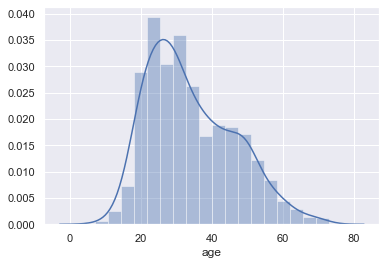

In [11]:
#your answers here
item['release year'] = item['release date'].apply(lambda x: x.split("-")[2])

# Age
sns.distplot(user.age);

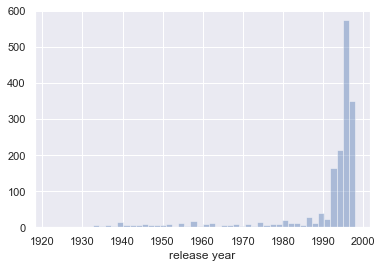

In [12]:
# Year release
sns.distplot(item['release year'],kde=False);

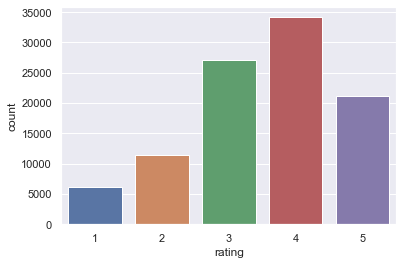

In [13]:
# Rating
sns.countplot(data.rating);

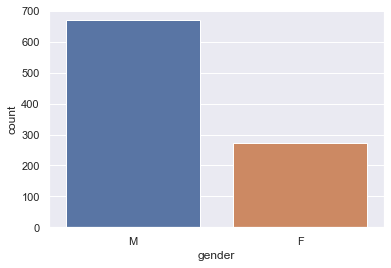

In [14]:
# Gender
sns.countplot(user.gender);

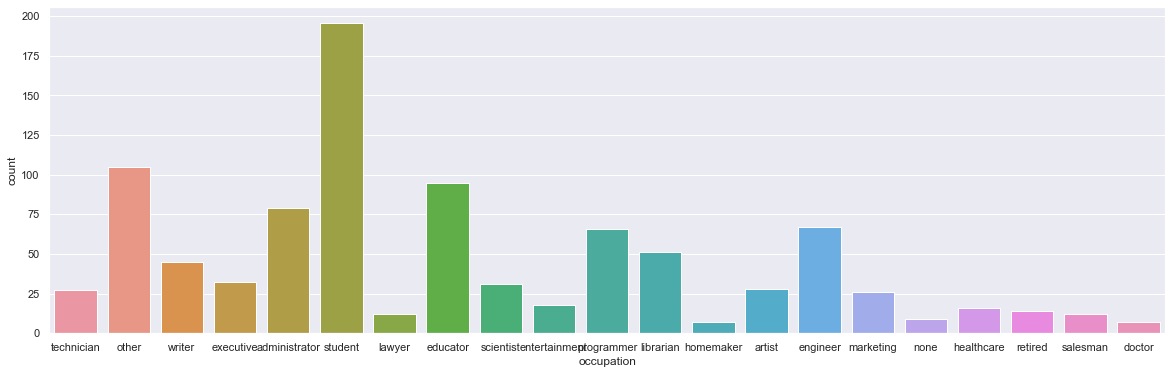

In [15]:
# Occupation
fig_dims = (20, 6)
fig, ax = plt.subplots(figsize=fig_dims)
sns.countplot(user.occupation);

### 8. Visualize how popularity of genres has changed over the years - 10 marks

Note that you need to use the number of releases in a year as a parameter of popularity of a genre

Hint 

1: you need to reach to a data frame where the release year is the index and the genre is the column names (one cell shows the number of release in a year in one genre) or vice versa.
Once that is achieved, you can either use univariate plots or can use the heatmap to visualise all the changes over the years 
in one go. 

Hint 2: Use groupby on the relevant column and use sum() on the same to find out the nuumber of releases in a year/genre.  

Visualizing in a heatmap


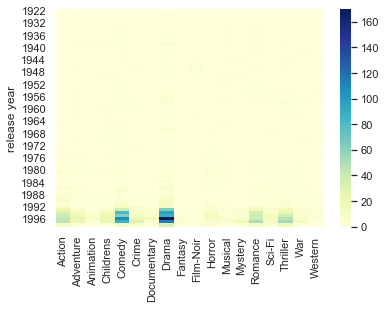

In [16]:
#Your answer here
item2['release year'] = item2['release date'].apply(lambda x: x.split("-")[2])
popularity=item2.groupby(['release year']).sum().drop('movie id',axis=1)

print('Visualizing in a heatmap')
sns.heatmap(popularity,cmap='YlGnBu');


Visualizing in a univariate plots
Popularity of Action


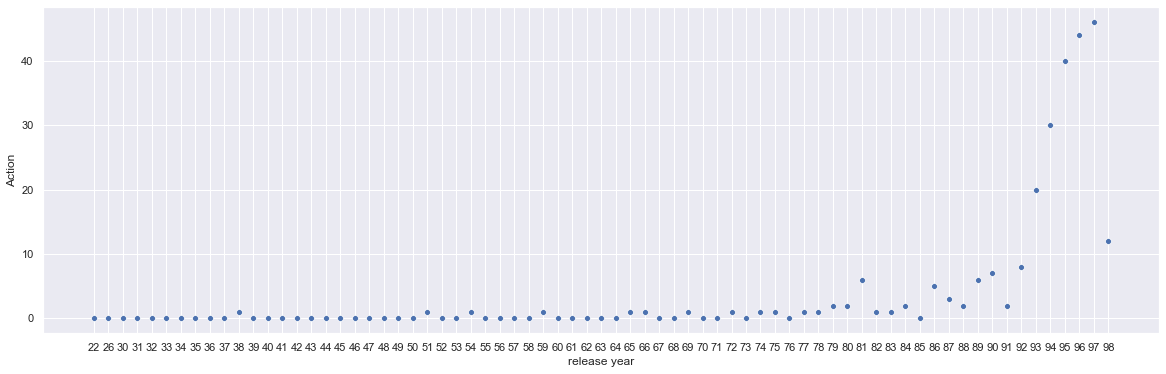

Popularity of Adventure


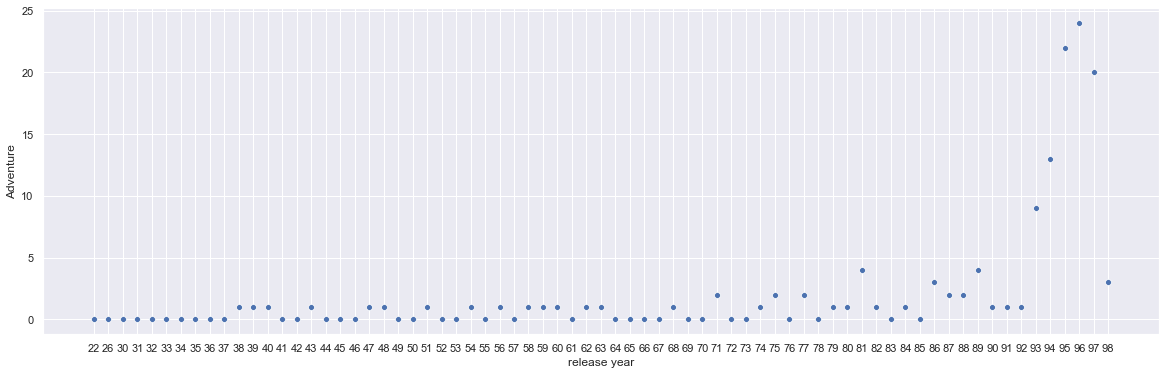

Popularity of Animation


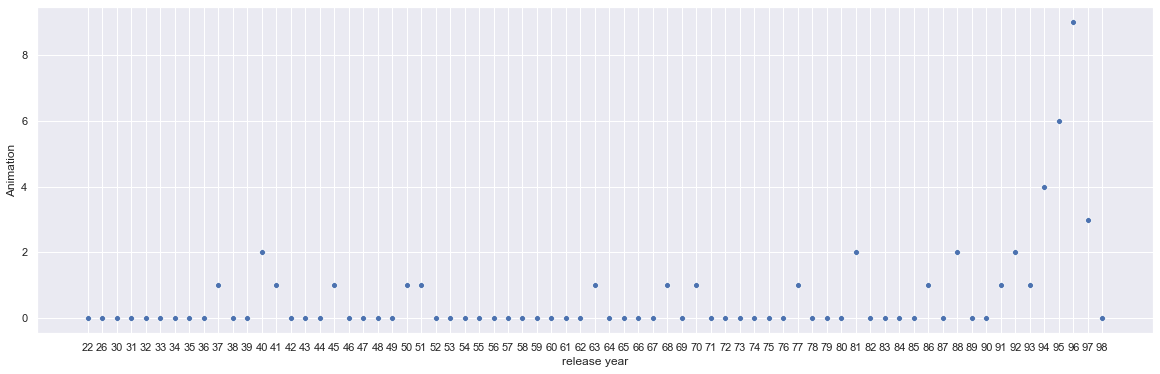

Popularity of Childrens


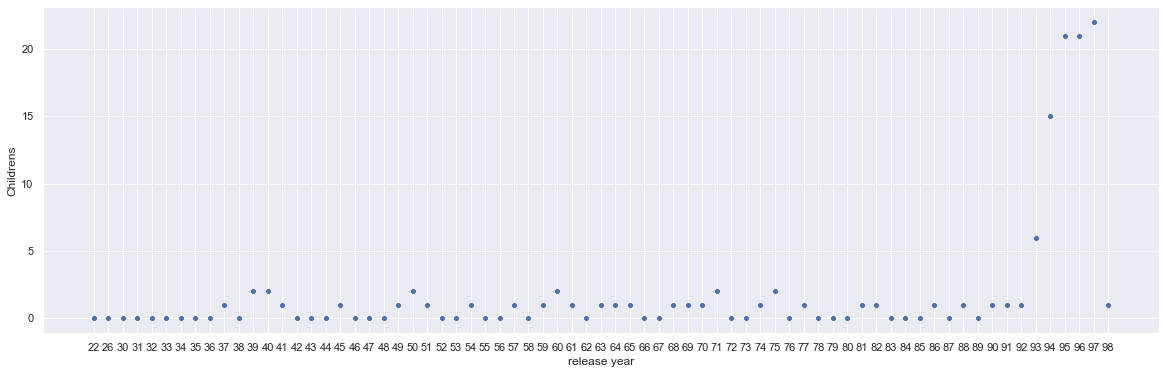

Popularity of Comedy


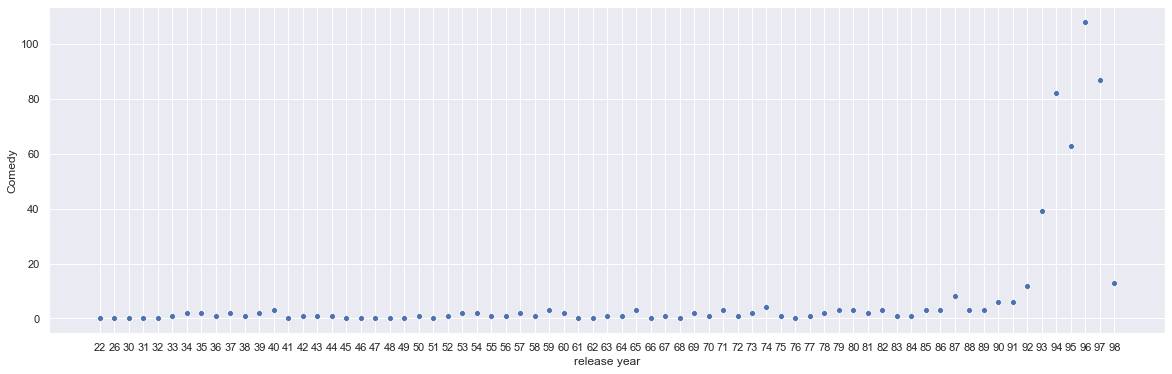

Popularity of Crime


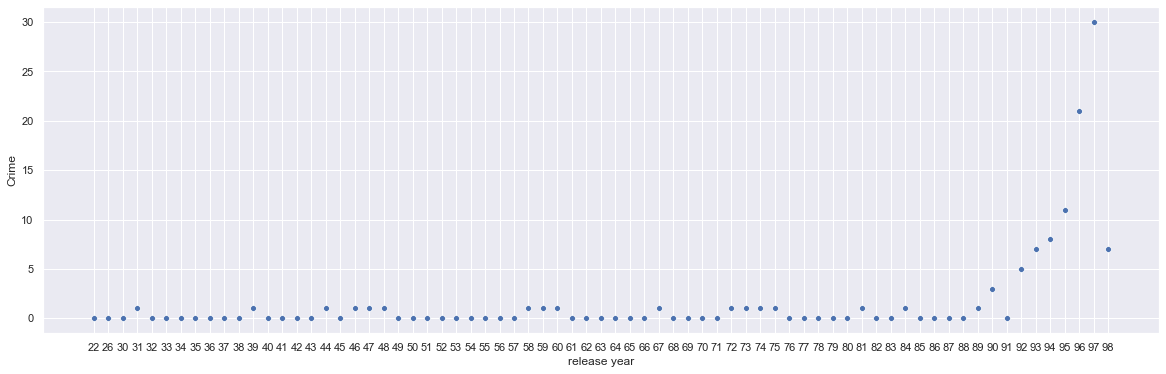

Popularity of Documentary


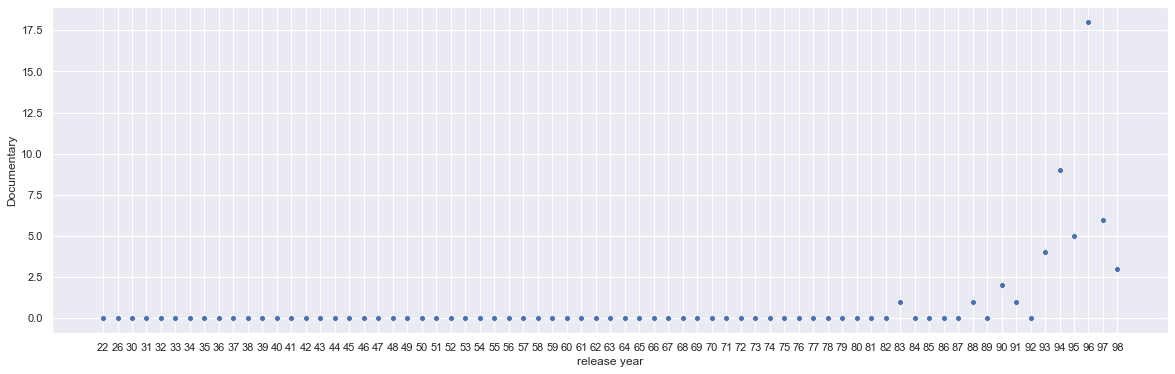

Popularity of Drama


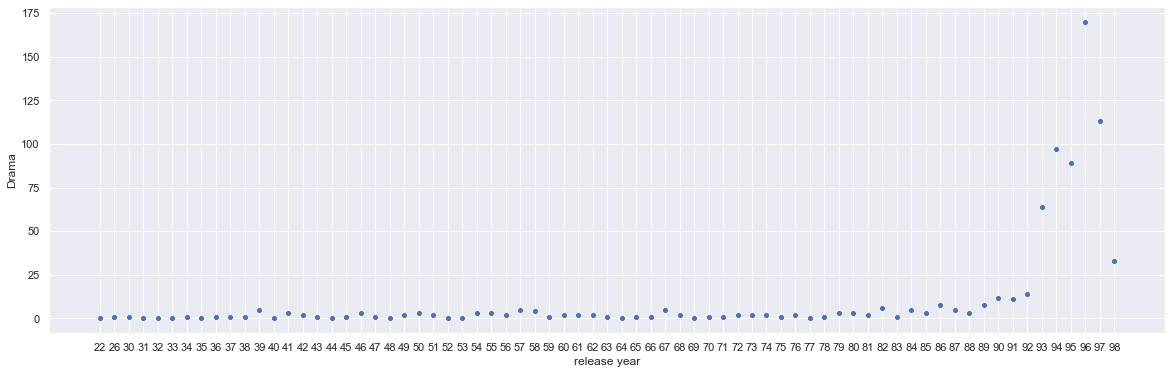

Popularity of Fantasy


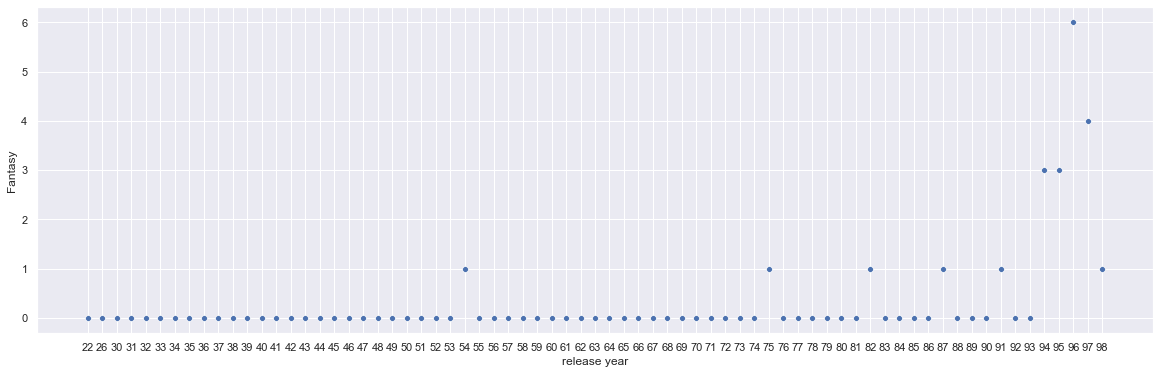

Popularity of Film-Noir


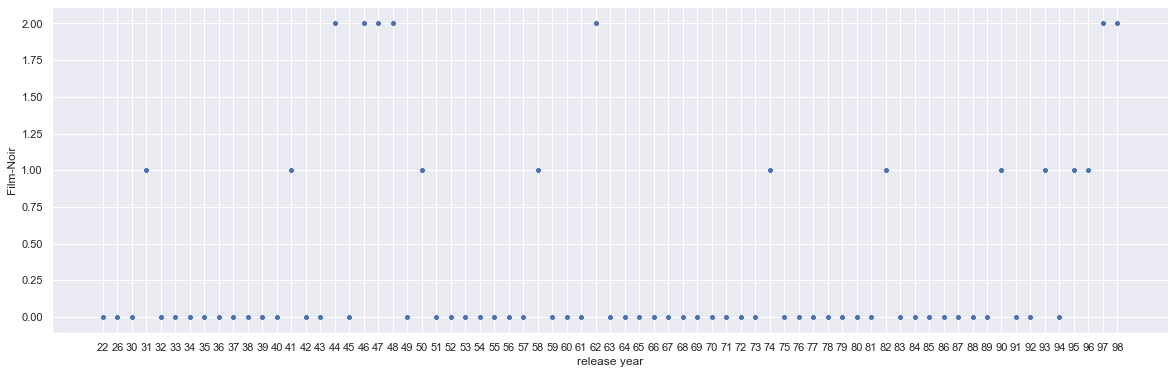

Popularity of Horror


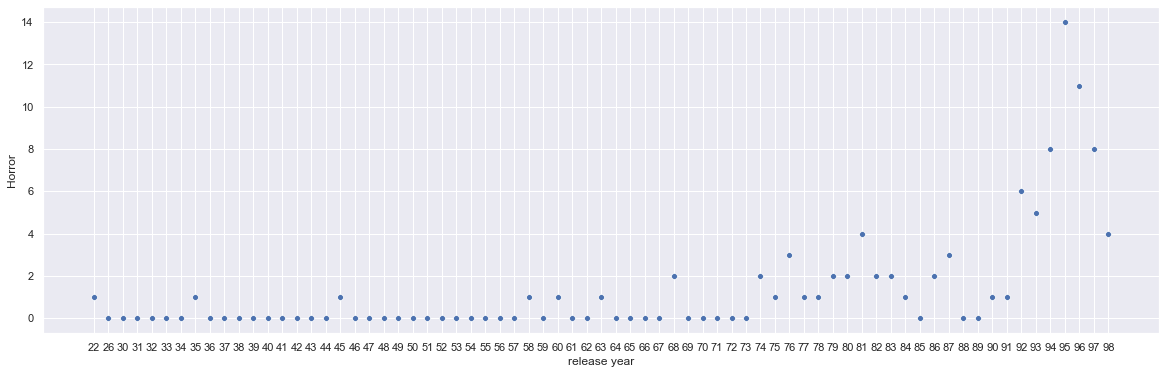

Popularity of Musical


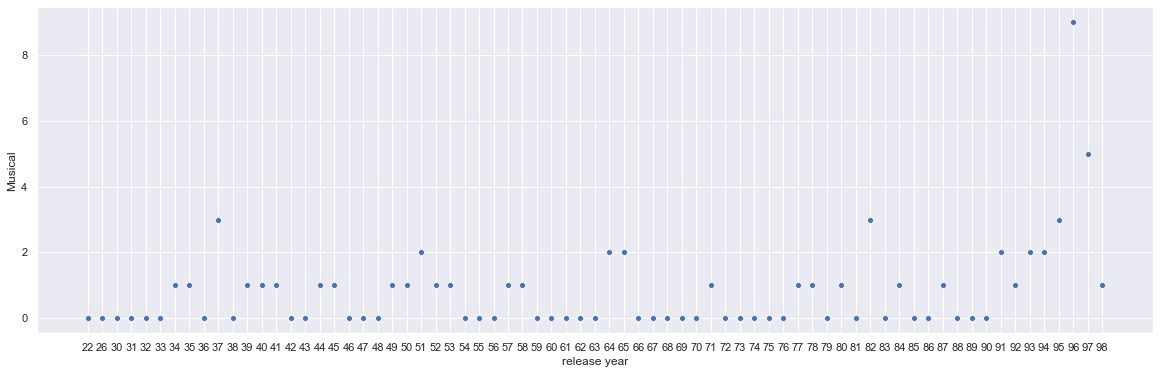

Popularity of Mystery


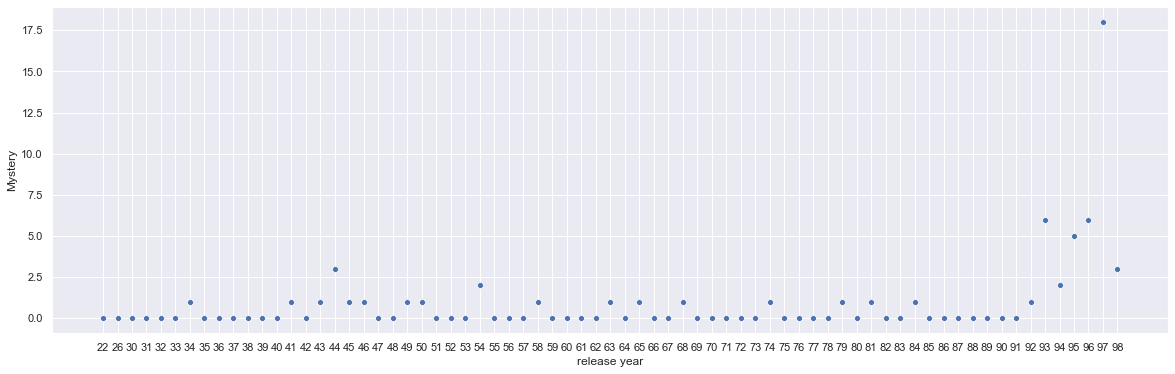

Popularity of Romance


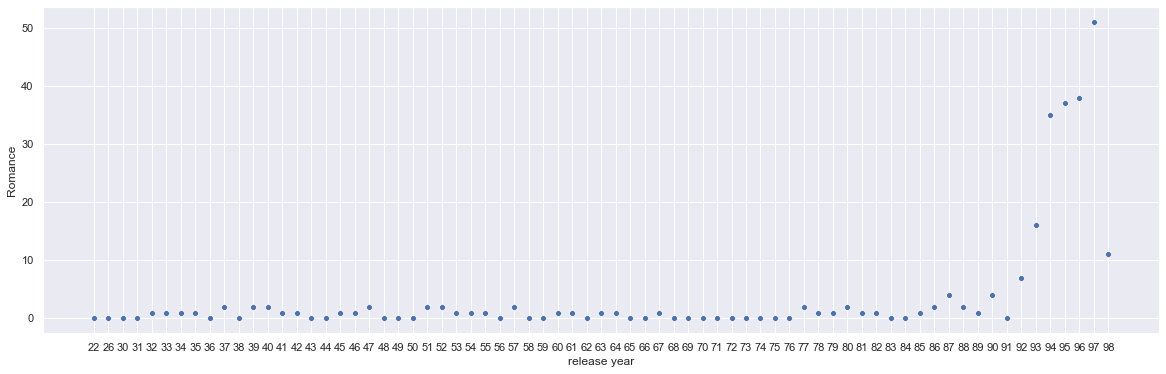

Popularity of Sci-Fi


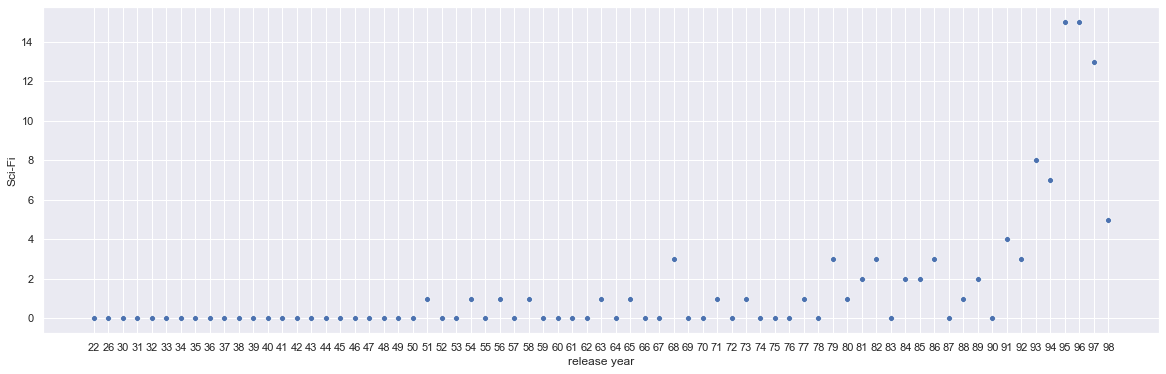

Popularity of Thriller


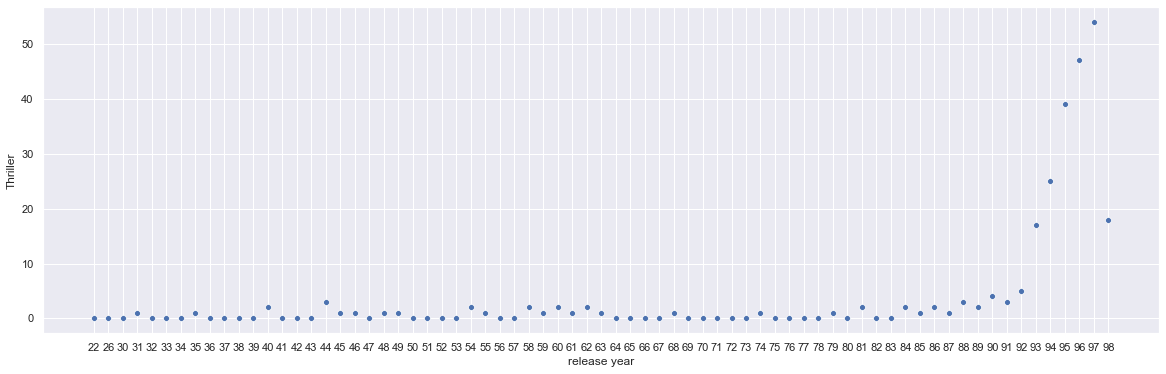

Popularity of War


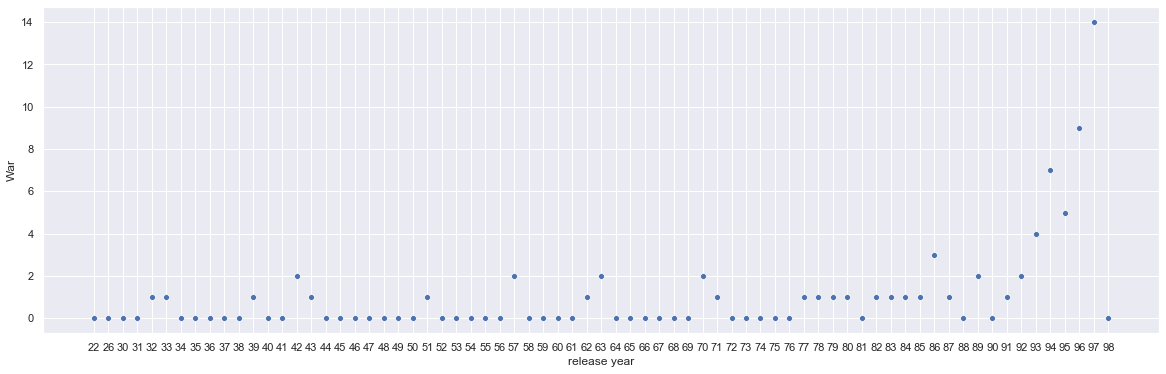

Popularity of Western


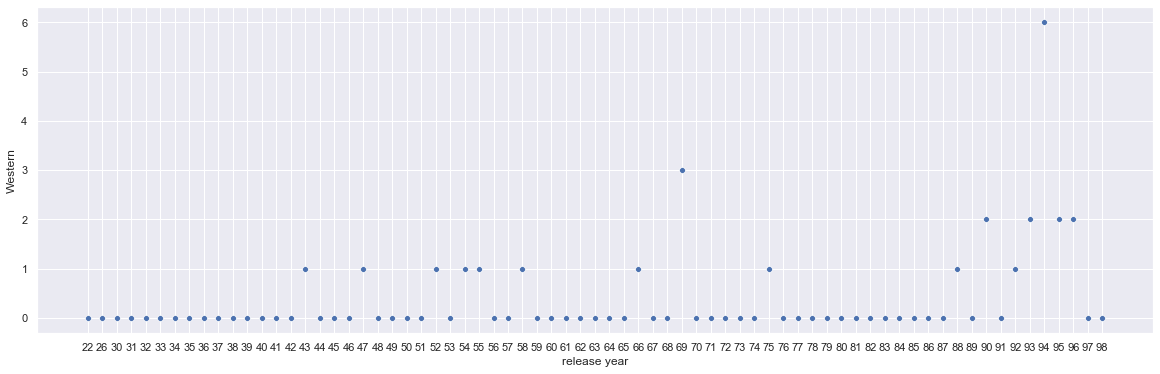

In [17]:
# Visualization variables individually across the years
names = popularity.columns
popularity['release year'] = popularity.index
popularity['release year']=popularity['release year'].str.slice(start=-2)


print('Visualizing individually')

for name in names:
    fig_dims = (20, 6)
    fig, ax = plt.subplots(figsize=fig_dims)
    
    sns.scatterplot(x="release year", y=name, data=popularity)
    
    print('Popularity of',name)
    plt.show()

### 9. Find the top 25 movies according to average ratings such that each movie has number of ratings more than 100 - 10 marks

Hint : 
1. First find the movies that have more than 100 ratings(use merge, groupby and count). Extract the movie titles in a list.
2. Find the average rating of all the movies and sort them in the descending order. You will have to use the .merge() function to reach to a data set through which you can get the names and the average rating.
3. Use isin(list obtained from 1) to filter out the movies which have more than 100 ratings.

Note: This question will need you to research about groupby and apply your findings. You can find more on groupby on https://realpython.com/pandas-groupby/.

In [18]:
#your answer here
top_movies = data.merge(item,on='movie id')
# there exist a movie id that is not included in item dataset
print('The following id has not a match in the item dataset:',np.setdiff1d(data['movie id'],item['movie id']))

#list of index of the movies which has more than 100 ratings
aux= top_movies.groupby('movie id').count()
aux = aux[aux['rating']>100].index 

# average of ratings per movie in descendent order
top_movies = top_movies.groupby('movie id').mean().sort_values('rating',ascending=False)
top_movies['movie id'] = top_movies.index
# filtering movies, keeping those with more than 100 ratings
result = top_movies[top_movies['movie id'].isin(aux) ]
result.index.name = None
top_25_movies = result.merge(item[['movie id','movie title']],on="movie id")

print('Top 25 movies according to average rating and with more than 100 reviews')
top_25_movies[0:25][['movie title']]


The following id has not a match in the item dataset: [267]
Top 25 movies according to average rating and with more than 100 reviews


,movie title
0,"Close Shave, A"
1,Schindler's List
2,"Wrong Trousers, The"
3,Casablanca
4,"Shawshank Redemption, The"
5,Rear Window
6,"Usual Suspects, The"
7,Star Wars
8,12 Angry Men
9,Citizen Kane


### 10. See gender distribution across different genres check for the validity of the below statements - 10 marks

* Men watch more drama than women
* Women watch more Sci-Fi than men
* Men watch more Romance than women


1. There is no need to conduct statistical tests around this. Just compare the percentages and comment on the validity of the above statements.

2. you might want ot use the .sum(), .div() function here.
3. Use number of ratings to validate the numbers. For example, if out of 4000 ratings received by women, 3000 are for drama, we will assume that 75% of the women watch drama.

#### Conclusion:



In [19]:
# gender distribution across the genres

# we need to merge all three datasets in order to map which genre an user has ranked. 
aux = data.merge(user,on='user id')
aux = aux.merge(item2, on='movie id') # we lost some observation due to there exist one movie that is not in item dataset

# we summarise the total movies per genre that were rating by gender
data_by_sex = aux.groupby('gender').sum()
data_by_sex

# with this new data set we can compare by frequency which gender watch more a certain genre of movies

# analyzing first statement: Men watch more drama than women
print(data_by_sex[['Drama']],'\n')

# Answer: According to the data, there are 11,008 women and 28,887 men that watched Drama movies. So, we can validate 
# that men whatch more drama than women in a proportion of 2.62 (28887/11008). In percentage, around 72% of the people who
# watched drama movies were men.

# analyzing second statement: Women watch more Sci-Fi than men
print(data_by_sex[['Sci-Fi']],'\n')

# Answer: According to the data, there are 2,629 women and 10,101 men that watched Sci-Fi movies. So, we can validate 
# that women whatch more Sci-Fi than men in a proportion of 3.84 (10101/2629). In percentage, around 79% of the people who
# watched Sci-Fi movies were women.

# analyzing third statement: Men watch more Romance than women
print(data_by_sex[['Romance']])

# Answer: According to the data, there are 13,603 men and 5,858 women that watched Romance movies. So, we can validate 
# that men whatch more Romance than women in a proportion of 2.32 (13603/5858). In percentage, around 70% of the people who
# watched Romance movies were men.

        Drama
gender       
F       11008
M       28887 

        Sci-Fi
gender        
F         2629
M        10101 

        Romance
gender         
F          5858
M         13603


In [105]:
# if we analize this statements considering all men and women across all genres we have the following. (i.e. we count all the
# ratings per genre made by gender and then divide them by the corresponding total of ratings made by gender.)
aux=data_by_sex.drop(['user id','movie id','rating','timestamp','age'],axis=1)
total_gender=aux.sum(axis=1)

# analyzing first statement: Men watch more drama than women
total = pd.DataFrame({'Drama' : total_gender})

print(data_by_sex[['Drama']].div(total),'\n')

# Answer: According to the data, 20.5% of women watched Drama movies and almost 18% of men watched the same genre.
# So, we can refuse the statement that men whatch more drama than women. This may be no so significant due to the difference
# of only 2% approximately.

# analyzing second statement: Women watch more Sci-Fi than men
total = pd.DataFrame({'Sci-Fi' : total_gender})
print(data_by_sex[['Sci-Fi']].div(total),'\n')

# Answer: According to the data, almost 5% of women watched Sci-Fi movies and a little above of 6% of men watched the same
# genre. So, we can refuse the statement that Women watch more Sci-Fi than men. This may be no so significant due to the 
# small difference of 1% approximately.

# analyzing third statement: Men watch more Romance than women
total = pd.DataFrame({'Romance' : total_gender})
print(data_by_sex[['Romance']].div(total))

# Answer: According to the data, almost 11% of women watched Romance movies and 8.5% of men watched the same genre. 
# So, we can refuse the statement that Men watch more Romance than women. This may be no so significant due to the 
# small difference of 2.5% approximately.

# As a general conclusion and based on the previous analyses with two different perspectives, it is really important
# to emphasize that different approaches in solving a problem could lead in to different results and, consequently,
# different conclusions.

           Drama
gender          
F       0.204987
M       0.181812 

          Sci-Fi
gender          
F       0.048956
M       0.063575 

         Romance
gender          
F       0.109085
M       0.085616
